In [2]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
train_data = pd.read_table('train.txt')
test_data = pd.read_table('test.txt')

In [4]:
print('훈련용 데이터 개수 :',len(train_data))
train_data[:5]

훈련용 데이터 개수 : 2900


,Document,label
0,넘 두렵다ㅠㅠㅠㅠ,4
1,아놔 코 막혀,2
2,교수님 진짜 밉다...,2
3,다이어트 하니까 약속 나갈 때마다 곤욕이닾,1
4,인간수업 광고 너무 징그러워..,5


In [5]:
train_data['Document'].nunique(), train_data['label'].nunique()

(2892, 6)

In [6]:
train_data.drop_duplicates(subset=['Document'], inplace=True)

In [7]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 2892


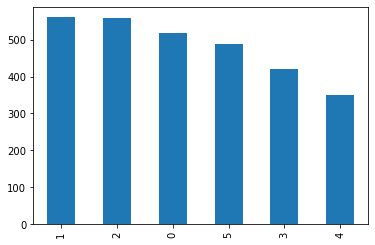

In [8]:
train_data['label'].value_counts().plot(kind = 'bar')

In [9]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    518
1      1    560
2      2    558
3      3    419
4      4    349
5      5    488


In [10]:
print(train_data.isnull().values.any())

False


In [11]:
print(train_data.isnull().sum())

Document    0
label       0
dtype: int64


In [12]:
train_data.loc[train_data.Document.isnull()]

,Document,label


In [13]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any())

False


In [14]:
print(len(train_data))

2892


In [15]:
text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
re.sub(r'[^a-zA-Z ]', '', text) #알파벳과 공백을 제외하고 모두 제거

'do you expect people to read the FAQ etc and actually accept hard atheism'

In [16]:
train_data['Document'] = train_data['Document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,Document,label
0,넘 두렵다ㅠㅠㅠㅠ,4
1,아놔 코 막혀,2
2,교수님 진짜 밉다,2
3,다이어트 하니까 약속 나갈 때마다 곤욕이닾,1
4,인간수업 광고 너무 징그러워,5


In [17]:
train_data['Document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

Document    0
label       0
dtype: int64


In [18]:
train_data.loc[train_data.Document.isnull()][:5]

,Document,label


In [19]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

2892


In [20]:
test_data.drop_duplicates(subset = ['Document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['Document'] = test_data['Document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['Document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 949


In [21]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [1]:
okt = Okt()
#okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

NameError: name 'Okt' is not defined

In [23]:
X_train = []
for sentence in train_data['Document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [24]:
print(X_train[:5])

[['넘다', '두렵다', 'ㅠㅠㅠㅠ'], ['아', '놓다', '코', '막히다'], ['교수', '님', '진짜', '밉다'], ['다이어트', '약속', '나가다', '때', '마다', '곤욕', '닾'], ['인간', '수업', '광고', '너무', '징그럽다']]


In [25]:
X_test = []
for sentence in test_data['Document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [27]:
print(tokenizer.word_index)

{'너무': 1, '진짜': 2, '나': 3, '아': 4, '오다': 5, '내': 6, '보다': 7, '거': 8, '친구': 9, '사람': 10, '오늘': 11, '싫다': 12, '기분': 13, '받다': 14, '좋다': 15, '안': 16, '스럽다': 17, '짜증나다': 18, '알바': 19, 'ㅠㅠ': 20, '같다': 21, '넘다': 22, '가다': 23, '다': 24, '무섭다': 25, '때': 26, '먹다': 27, '있다': 28, '이다': 29, '만': 30, '화나다': 31, '에서': 32, '없다': 33, '하': 34, '한테': 35, '집': 36, '이야': 37, 'ㅋㅋㅋ': 38, '괴롭다': 39, '못': 40, '들다': 41, '보고': 42, '말': 43, '엄마': 44, '지금': 45, '겁나다': 46, '나다': 47, '나오다': 48, '마다': 49, '것': 50, '생각': 51, '인데': 52, '함': 53, '을': 54, '마음': 55, '때문': 56, '우리': 57, '돼다': 58, '왜': 59, '요즘': 60, '아빠': 61, '개': 62, '역겹다': 63, 'ㄹㅇ': 64, '게': 65, '난': 66, 'ㅋㅋ': 67, '속': 68, '제일': 69, 'ㅠ': 70, '되다': 71, '더럽다': 72, '세상': 73, '애': 74, '야': 75, '싶다': 76, '슬프다': 77, '혐오': 78, '놀라다': 79, '신나다': 80, '학교': 81, '두렵다': 82, '기쁘다': 83, '로': 84, 'ㅋㅋㅋㅋ': 85, '분하다': 86, '열': 87, '아깝다': 88, '꼴불견': 89, '고': 90, '오싹하다': 91, '뭔가': 92, '징그럽다': 93, '자다': 94, '적': 95, '소름': 96, '중': 97, '이렇게': 98, '죽다': 99, '토나오다': 100, '걱정': 1

In [28]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2760
등장 빈도가 2번 이하인 희귀 단어의 수: 1849
단어 집합에서 희귀 단어의 비율: 66.9927536231884
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 15.186130896384894


In [29]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 912


In [30]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [31]:
print(X_train[:3])

[[22, 82, 250], [4, 274, 721, 722], [187, 129, 2, 514]]


In [32]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [33]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [34]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

2861
2861


In [35]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

941
941


데이터의 최대 길이 : 15
데이터의 평균 길이 : 4.411744145403705


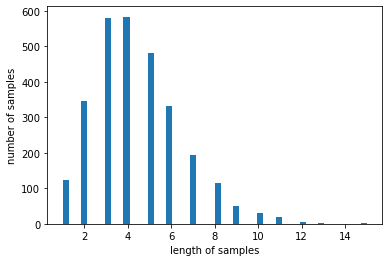

In [36]:
print('데이터의 최대 길이 :',max(len(l) for l in X_train))
print('데이터의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [38]:
max_len = 8
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 8 이하인 샘플의 비율: 96.26004893393917


In [39]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [39]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Input, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [40]:
model = Sequential()
#model.add(Embedding(vocab_size, 100))
model.add(Embedding(vocab_size, 100, input_shape=(max_len, )))
#model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(6, activation='softmax', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 100)            91200     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
output (Dense)               (None, 6)                 774       
Total params: 209,222
Trainable params: 209,222
Non-trainable params: 0
_________________________________________________________________


In [41]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [42]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, callbacks=[es, mc], batch_size=60, validation_split=0.3)

Epoch 1/20
33/34 [============================>.] - ETA: 0s - loss: 1.7234 - acc: 0.3455
Epoch 00001: val_acc improved from -inf to 0.37835, saving model to best_model.h5
34/34 [==============================] - 2s 44ms/step - loss: 1.7214 - acc: 0.3492 - val_loss: 1.6009 - val_acc: 0.3783
Epoch 2/20
31/34 [==========================>...] - ETA: 0s - loss: 1.3095 - acc: 0.5833- ETA: 0s - loss: 1.3359 - acc: 0.567
Epoch 00002: val_acc improved from 0.37835 to 0.62864, saving model to best_model.h5
34/34 [==============================] - 1s 26ms/step - loss: 1.2889 - acc: 0.5904 - val_loss: 1.0892 - val_acc: 0.6286
Epoch 3/20
33/34 [============================>.] - ETA: 0s - loss: 0.6795 - acc: 0.8374
Epoch 00003: val_acc improved from 0.62864 to 0.77765, saving model to best_model.h5
34/34 [==============================] - 1s 20ms/step - loss: 0.6769 - acc: 0.8372 - val_loss: 0.7073 - val_acc: 0.7776
Epoch 4/20
34/34 [==============================] - ETA: 0s - loss: 0.3472 - acc: 0.

In [43]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

30/30 [==============================] - 0s 5ms/step - loss: 0.2799 - acc: 0.9160

 테스트 정확도: 0.9160


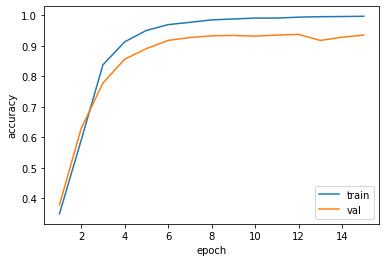

In [44]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

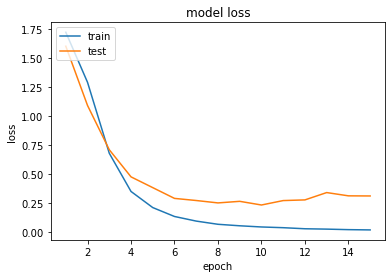

In [45]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
model = load_model('best_model.h5', compile=False)

export_path = './New_LSTM'
model.save(export_path, save_format="tf")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./New_LSTM\assets


In [47]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.post_training_quantize = True
tflite_model = converter.convert()

open('./New_LSTM/new_lstm_model.tflite', 'wb').write(tflite_model)

860084

In [44]:
import tensorflow as tf
import numpy as np
from konlpy.tag import Okt

interpreter = tf.lite.Interpreter(model_path='./New_LSTM/new_lstm_model.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

test_data=input()

N_test = []
temp_X = []
temp_X = okt.morphs(test_data, stem=True) # 토큰화
#print(temp_X)
temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
print(temp_X)
N_test.append(temp_X)

N_test = tokenizer.texts_to_sequences(N_test)
print(N_test)
N_test = pad_sequences(N_test, maxlen = max_len)
N_test = N_test.astype(dtype=np.float32)
print(N_test)

interpreter.set_tensor(input_index, N_test)
interpreter.invoke()

label = ["기쁨", "슬픔", "분노", "놀람", "공포", "혐오"]

predict_label = np.argmax(output()[0])
# Get label name with label index.
predict_label_name = label[predict_label]
print(predict_label_name)

짜증나
['짜증나다']
[[18]]
[[ 0.  0.  0.  0.  0.  0.  0. 18.]]
[4.1138774e-06 2.2488639e-04 9.9942267e-01 1.3684647e-06 1.0324563e-06
 3.4603957e-04]
분노


In [49]:
import tensorflow as tf
import numpy as np
from konlpy.tag import Okt

interpreter = tf.lite.Interpreter(model_path='./New_LSTM/new_lstm_model.tflite')
interpreter.allocate_tensors()

test_data=input()

#okt = Okt()
#stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

N_test = []
temp_X = []
temp_X = okt.morphs(test_data, stem=True) # 토큰화
temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
N_test.append(temp_X)

N_test = tokenizer.texts_to_sequences(N_test)
N_test = pad_sequences(N_test, maxlen = max_len)

predict_class=model.predict_classes(N_test)
print(predict_class.T)

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

print(input_details[0]['shape']) #[1 563]
print(input_details[0]['index']) #0
print(output_details[0]['index']) #44

N_test = N_test.astype(dtype=np.float32)

print(N_test)

#input_details[0]['index'] = input_details[0]['index'].astype(dtype=np.float32)
#input_details[0]['index'] = tf.cast(input_details[0]['index'], tf.float32)

interpreter.set_tensor(input_details[0]['index'],N_test)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print("output:",output_data)

result = []
output_data = interpreter.get_tensor(output_details[0]['index'])
result.append(output_data)
print("output_data:", np.reshape(result, -1))

label = ["기쁨", "슬픔", "분노"]
y_predict = interpreter.get_tensor(0)

predict = np.reshape(result, -1)

y_predict = model(N_test).numpy()
print("model_result:", label[np.argmax(y_predict[0])])

y_predict = interpreter.get_tensor(0)
print(y_predict)
print(np.argmax(y_predict[0]))
print(label[np.argmax(y_predict[0])])


너무 짜증나
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[2]
[{'name': 'embedding_input', 'index': 0, 'shape': array([1, 8]), 'shape_signature': array([1, 8]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 44, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[1 8]
0
44
[[ 0.  0.  0.  0.  0.  0.  1. 18.]]
output: [[6.4032229e-06 4.2296009e-04 9.9902070e-01 1.0882836e-06 3.3239353e-06
  5.4556661e-04]]
output_data: [6.4032229e-06 4.2296009e-04 9.9902070e-01 1.0882836e-06 3.3239353e-06
 5.4556661e-04]
model_result: 분노
[[ 0.  0.  0.  0.  0.  0.  1. 18.]]
7


IndexError: list index out of range

In [84]:
#text = input()

test_data=pd.read_table('untitled.txt')

N_test = []
for sentence in test_data['Document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    N_test.append(temp_X)

N_test = tokenizer.texts_to_sequences(N_test)
N_test = pad_sequences(N_test, maxlen = max_len)

predict_class=model.predict_classes(N_test)
print(predict_class[0:5].T)

[2]


In [76]:
from konlpy.tag import Okt
okt = Okt()

test_data=input()

N_test = []
temp_X = []
temp_X = okt.morphs(test_data, stem=True) # 토큰화
temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
N_test.append(temp_X)
#N_test.append(test_data)
print(N_test)

N_test = tokenizer.texts_to_sequences(N_test)
N_test = pad_sequences(N_test, maxlen = max_len)

predict_class=model.predict_classes(N_test)
print(predict_class.T)



짜증나
[['짜증나다']]
[2]


In [142]:
from konlpy.tag import Okt
okt = Okt()

test_data=input()

N_test = []
temp_X = []
temp_X = okt.morphs(test_data, stem=True) # 토큰화
temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
N_test.append(temp_X)

N_test = tokenizer.texts_to_sequences(N_test)
N_test = pad_sequences(N_test, maxlen = max_len)

predict_class=model.predict_classes(N_test)
print(predict_class.T)

if(predict_class.T == 0):
    print("기쁨")
if(predict_class.T == 1):
    print("슬픔")
if(predict_class.T == 2):
    print("분노")
if(predict_class.T == 3):
    print("놀람")
if(predict_class.T == 4):
    print("공포")
if(predict_class.T == 5):
    print("혐오")

더러워
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[5]
혐오
